In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
import time

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd

from smoker_status.config import RAW_DATA_DIR

In [15]:
df_train = pd.read_csv(RAW_DATA_DIR / 'train.csv')
df_test = pd.read_csv(RAW_DATA_DIR / 'test.csv')

print('Column count:', len(df_train.columns))
print(df_train.columns)
print(df_train.shape)

print('Column count:', len(df_test.columns))
print(df_test.columns)
print(df_test.shape)

print('Trainning data')
print(df_train)
print('Testing data')
print(df_test)

Column count: 24
Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')
(159256, 24)
Column count: 23
Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')
(106171, 23)
Trainning data
            id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0            0   55         165          60       81.0             0.5   
1            1   70         165 

In [16]:
features = df_train.columns[1 : len(df_train.columns) - 1]
print(features)

X = df_train[features]
y = df_train['smoking']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=10
)

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')


<h2><b>This section will take a few seconds per k value to run!!</b></h2>

In [17]:
def findBestK(kvalues):
    r = []
    for k in kvalues:
        start_time = time.perf_counter()
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
        knn.fit(X_train, y_train)
        ypre = knn.predict(X_test)
        # print(ypre)
        accuracy = accuracy_score(y_test, ypre)
        print(k, accuracy)
        r.append(accuracy)
        stop_time = time.perf_counter()
        print('solution time: {:.2f} ms'.format((stop_time - start_time) * 1000))
    return r


kv = [3, 5, 11, 15, 27, 43, 51, 57]
kk = [24, 27, 29]
# acc = [0.6644271070436243, 0.6671899282608355, 0.666326546630457]
# acc = findBestK(kv)
acc = 0.7423512236472379

create a dataframe to display accuracy results and find the best k val

In [18]:
# showacc = pd.DataFrame({'k': kv, 'accuracy': acc})

# showacc.sort_values(by='accuracy', ascending=False)

# bestk = showacc.sort_values(by='accuracy', ascending=False).iloc[0]
# bestk = int(bestk.k)

bestk = 51
print('best k:', bestk, kv)

best k: 51 [3, 5, 11, 15, 27, 43, 51, 57]


In [19]:
cats = ['hearing(left)', 'hearing(right)', 'dental caries']
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
temp = pd.DataFrame(
    encoder.fit_transform(df_train[cats]), columns=encoder.get_feature_names_out(cats)
)
# add the new colums to the original dataframe
df_encoded = pd.concat([df_train, temp], axis=1)
# Drop the old categories
df_encoded = df_encoded.drop(cats, axis=1)
print(df_encoded)

            id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0            0   55         165          60       81.0             0.5   
1            1   70         165          65       89.0             0.6   
2            2   20         170          75       81.0             0.4   
3            3   35         180          95      105.0             1.5   
4            4   30         165          60       80.5             1.5   
...        ...  ...         ...         ...        ...             ...   
159251  159251   40         155          45       69.0             1.5   
159252  159252   50         155          75       82.0             1.0   
159253  159253   40         160          50       66.0             1.5   
159254  159254   50         165          75       92.0             1.2   
159255  159255   40         145          45       76.4             1.0   

        eyesight(right)  systolic  relaxation  fasting blood sugar  ...  AST  \
0                   0.6       1

Test accuracy with some features treated as categories.

In [21]:
c = list(df_encoded.columns)
c.remove('smoking')
c.remove('id')
print(c)
X = df_encoded[c]
# print(X)
y = df_encoded['smoking']
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

knn = KNeighborsClassifier(n_neighbors=bestk, weights='uniform')
knn.fit(X_train, y_train)

kypre = knn.predict(X_test)
skncats = accuracy_score(y_test, kypre)

print()
print('updated accuracy, K=', bestk, skncats)

print('accuracy improvement:', skncats - acc)  # [0])

skn = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

print('Cross val accuracy', skn)

['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'hearing(left)_1', 'hearing(left)_2', 'hearing(right)_1', 'hearing(right)_2', 'dental caries_0', 'dental caries_1']

updated accuracy, K= 51 0.7457302524174306
accuracy improvement: 0.0033790287701926935
Cross val accuracy 0.7465025318234985


In [23]:
y_predict_prob = knn.predict_proba(X_test)
# Estimated likelihood of smoking=1 for testing set
print(y_predict_prob[:, 1])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:, 1], pos_label=1)
AUC = metrics.auc(fpr, tpr)
print(metrics.roc_auc_score(y_test, y_predict_prob[:, 1]))

[0.07843137 0.47058824 0.54901961 ... 0.76470588 0.78431373 0.82352941]
0.8258032431007066


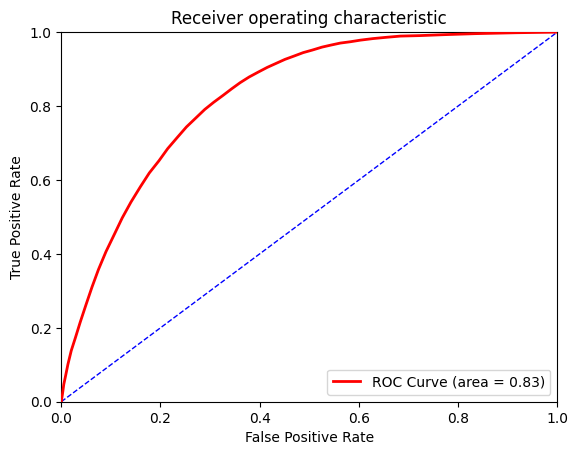

In [24]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (area = {AUC:0.2f})', zorder=3)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([0, 1])
plt.ylim([0, 1])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')

plt.show()